In [24]:
import sklearn.datasets
import umap
import umap.plot
import pickle
import numpy as np

print("Loading data...")
data = np.load('smol_data.npz')
print("Loaded data of shape {}".format(data.shape))

Loading data...
Loaded data of shape (262144, 300)


In [26]:
print("Embedding into two dimensions using umap...")
embedding = umap.UMAP().fit(data)
print("Embedding complete.")

Embedding into two dimensions using umap...
Embedding complete.


In [88]:
average_diffs = np.array([np.diff(x.reshape((6, 50)), axis=1).mean() for x in data])

<Axes: >

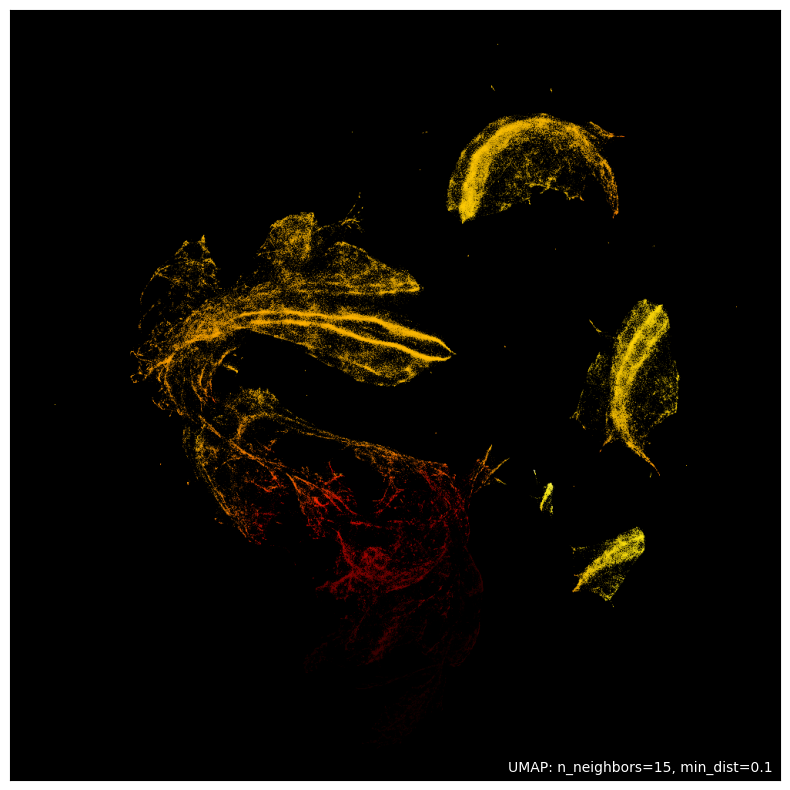

In [91]:
umap.plot.points(
     embedding,
     values=average_diffs,
     theme='fire',
     width=1000,
     height=1000,
)

In [92]:
np.save("smol_embedding.npy", embedding.embedding_)
np.save("average_diffs.npy", average_diffs)